In [2]:
# Import necessary libraries for model 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

In [4]:
# Load the dataset
data = pd.read_csv("D:\\Crop Recommendation model\\Crop_recommendation.csv")


x = data.drop(columns=['crop'])  
y = data['crop'] 

In [5]:
data.shape

(2200, 8)

In [6]:
x.head()
y.head()

0    rice
1    rice
2    rice
3    rice
4    rice
Name: crop, dtype: object

C:\Users\abc\AppData\Local\Temp\ipykernel_11308\2612199185.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='crop',data=data, palette="turbo")


<Axes: xlabel='count', ylabel='crop'>

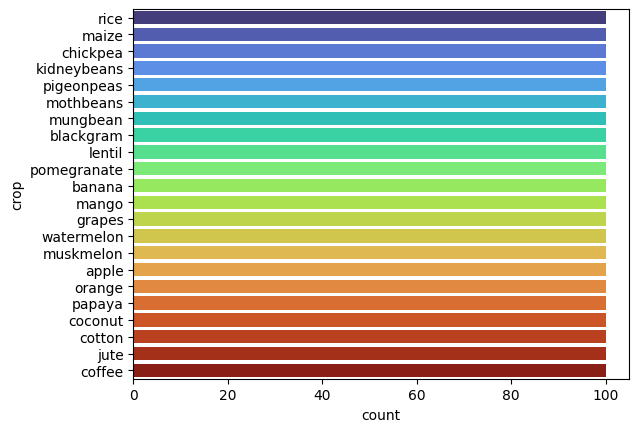

In [7]:
# counting values 
sns.countplot(y='crop',data=data, palette="turbo")

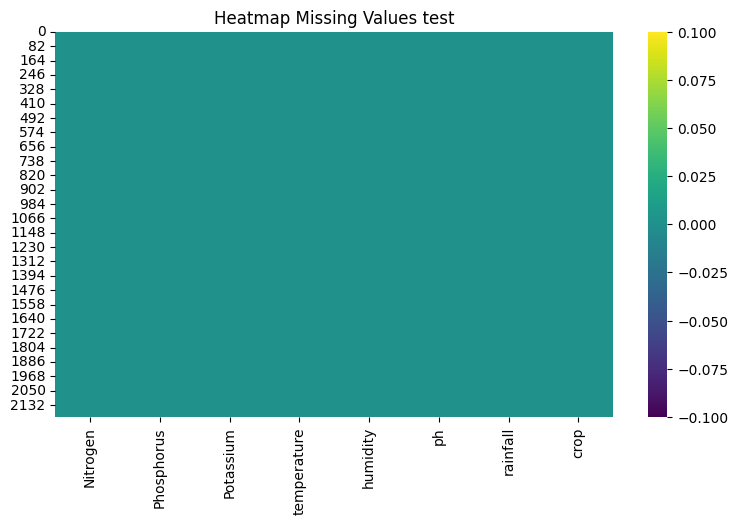

In [8]:
# Plot heatmap to visualize missing values
plt.figure(figsize=(9, 5))  # Create a new figure with specified size
# Create a heatmap of missing values using Seaborn
sns.heatmap(data.isnull(), cmap='viridis')
plt.title('Heatmap Missing Values test')  # Add a title to the heatmap
plt.show()  # Display the plot

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [10]:
data.describe()

Nitrogen   Phosphorus    Potassium  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

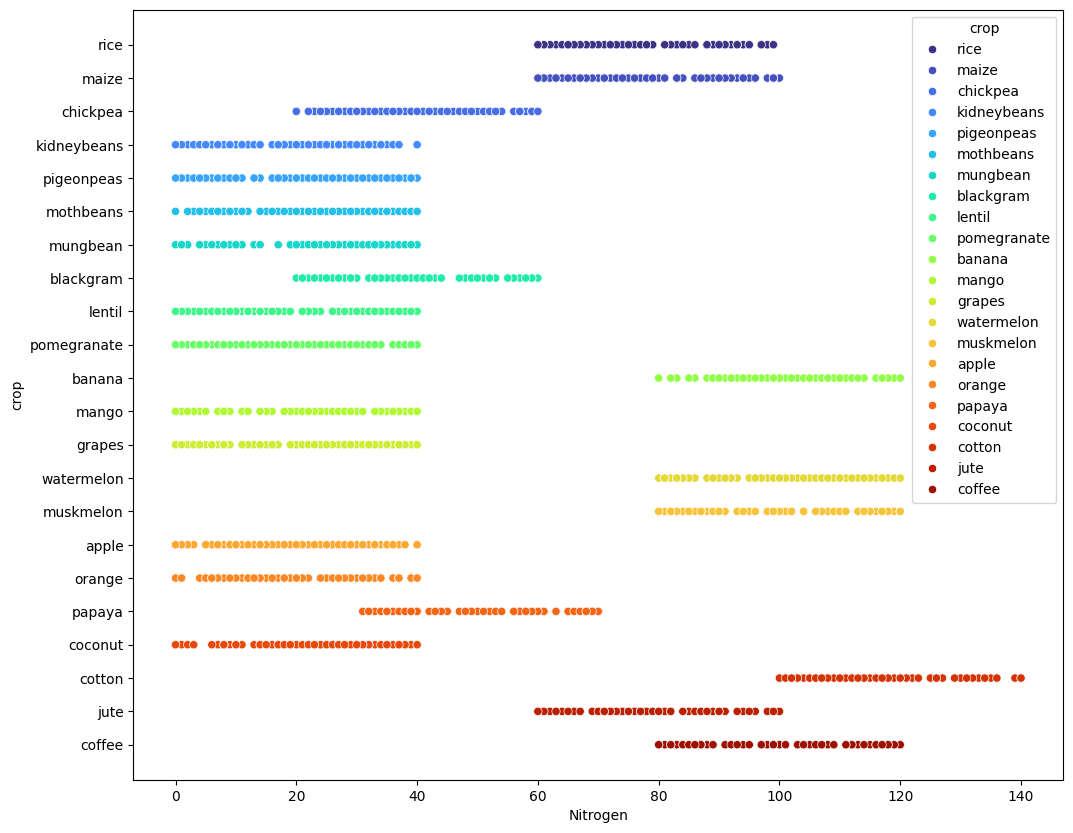

In [11]:
# finding outliners in "N" and "crop"
plt.figure(figsize = (12, 10))
sns.scatterplot(x= "Nitrogen", y="crop", data = data, hue='crop', palette='turbo')
plt.show()

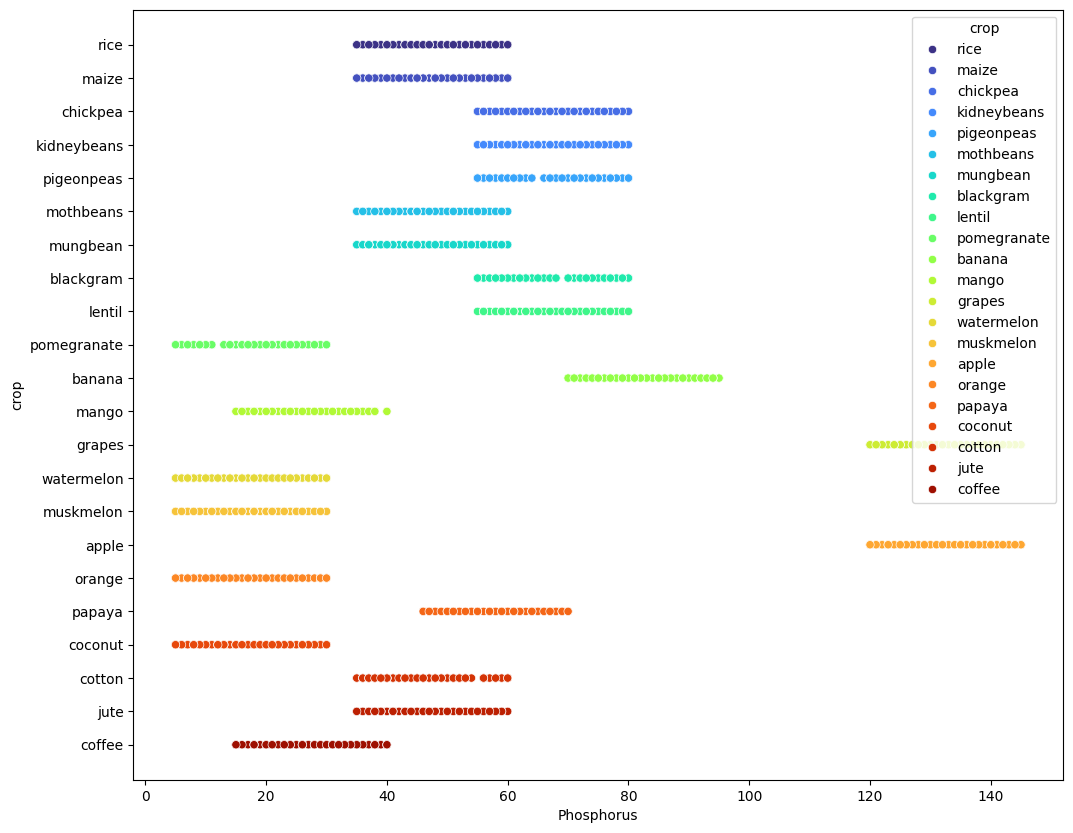

In [12]:
# finding outliners in "P" and "crop"
plt.figure(figsize = (12, 10))
sns.scatterplot(x= "Phosphorus", y="crop", data = data, hue='crop', palette='turbo')
plt.show()

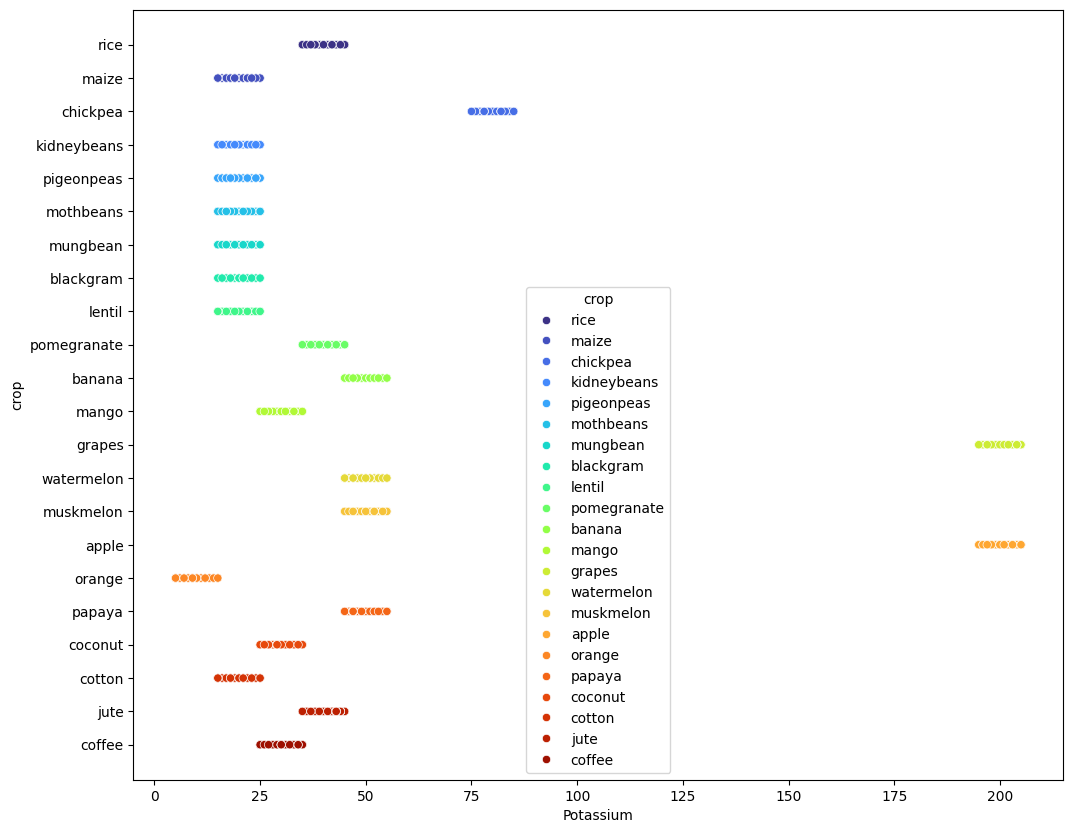

In [13]:
#finding outliners in "K" and "crop"
plt.figure(figsize = (12, 10))
sns.scatterplot(x= "Potassium", y="crop", data = data, hue='crop', palette='turbo')
plt.show()

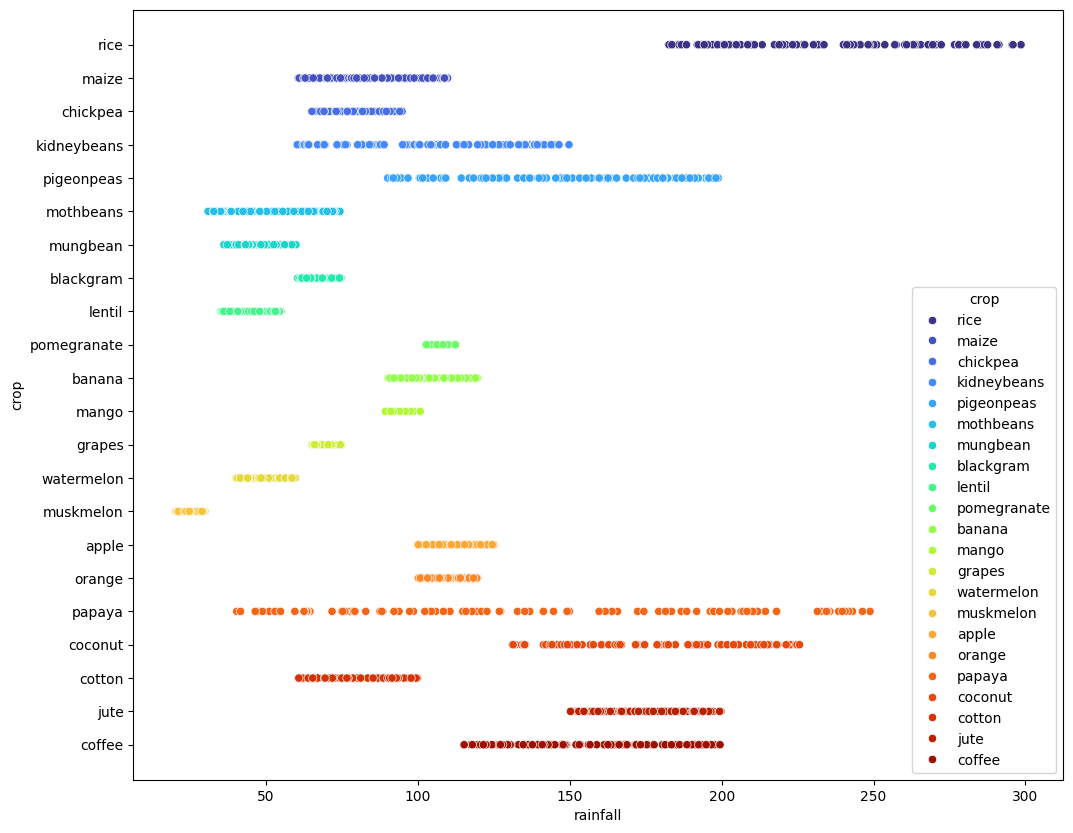

In [14]:
# finding outliners in "rainfall" and "crop"
plt.figure(figsize = (12, 10))
sns.scatterplot(x= "rainfall", y="crop", data = data, hue='crop', palette='turbo')
plt.show()

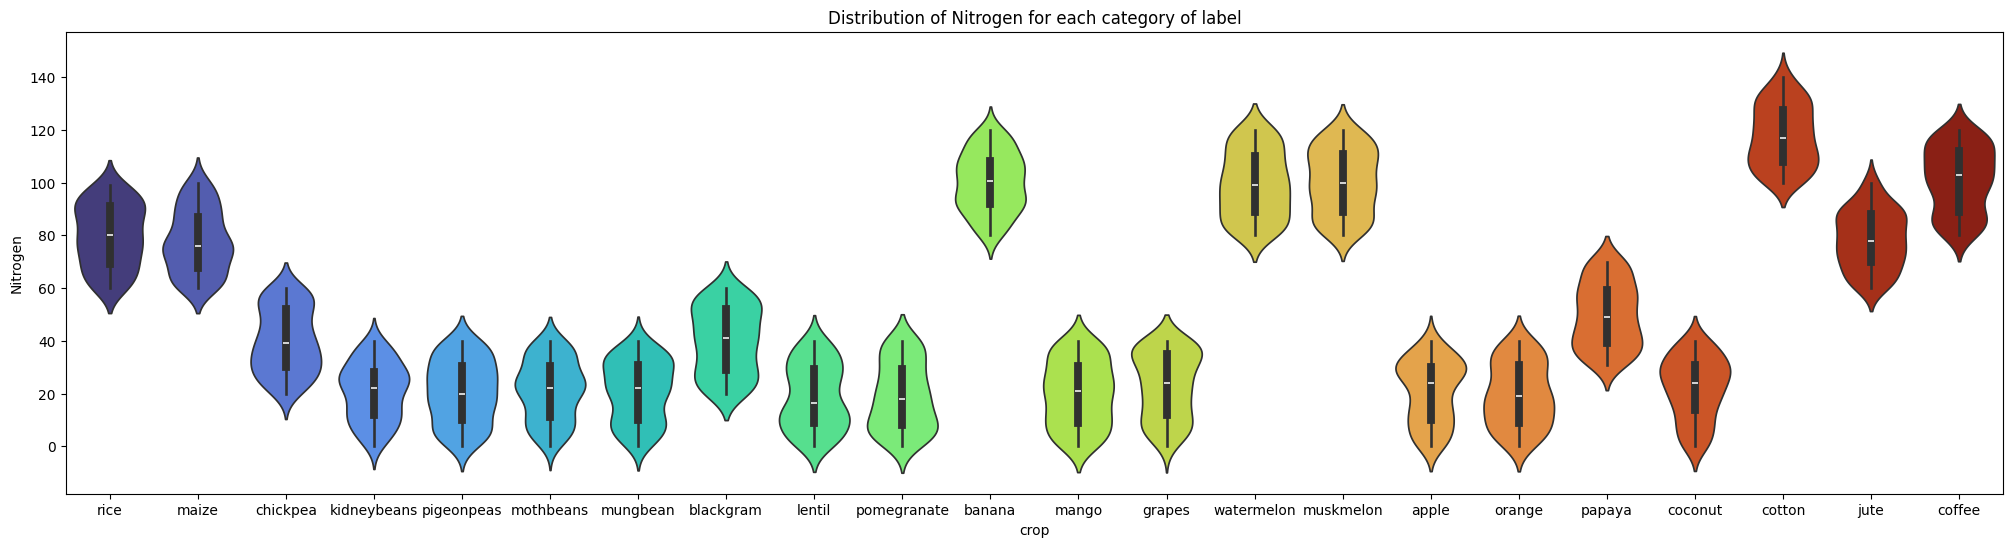

In [15]:
# skewness between Nitrogen and crop
plt.figure(figsize=(25, 6))
sns.violinplot(x='crop', y='Nitrogen', data=data, hue="crop", palette='turbo')
plt.title('Distribution of Nitrogen for each category of label')
plt.xlabel('crop')
plt.ylabel('Nitrogen')
plt.show()

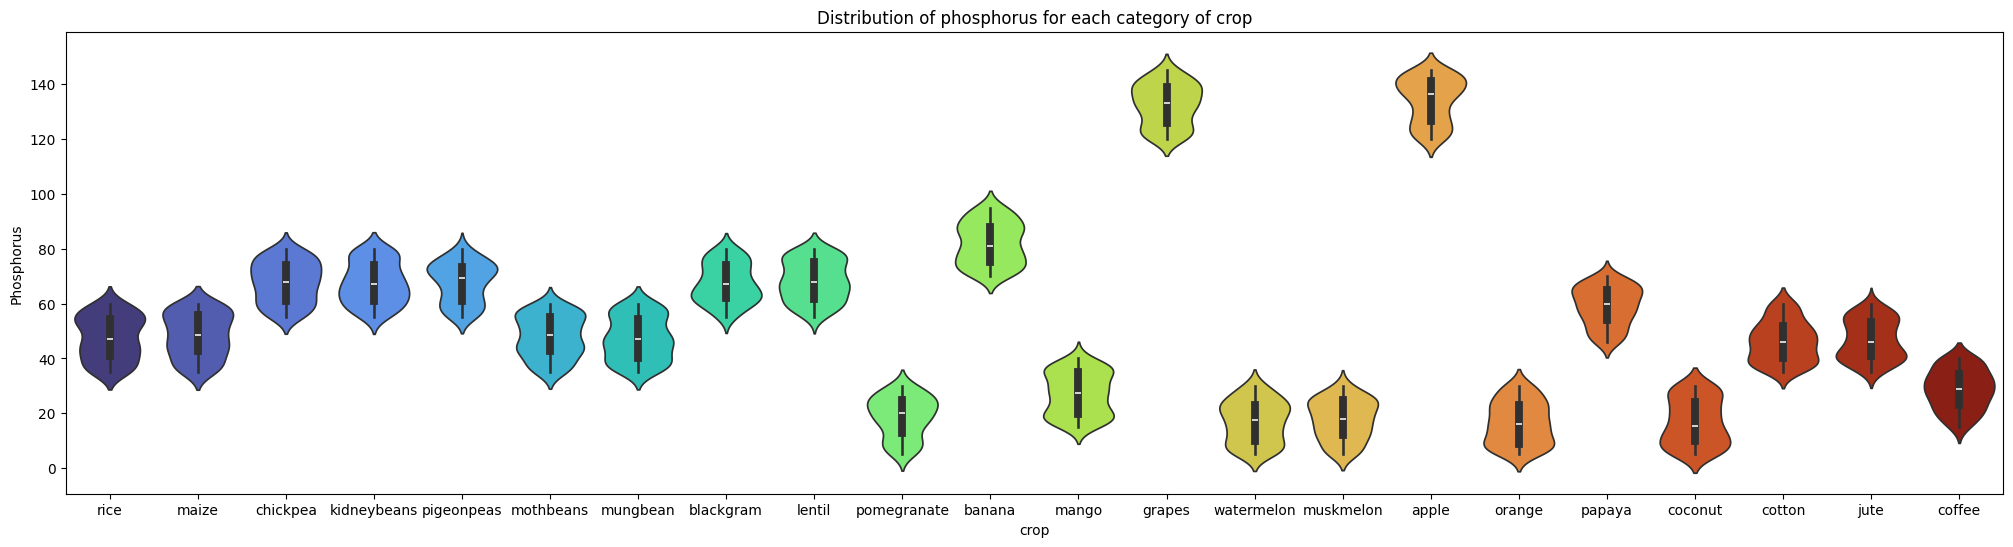

In [16]:
# skewness between Phosphorus and crop
plt.figure(figsize=(25, 6))
sns.violinplot(x='crop', y='Phosphorus', data=data, hue="crop", palette='turbo')
plt.title('Distribution of phosphorus for each category of crop')
plt.xlabel('crop')
plt.ylabel('Phosphorus')
plt.show()

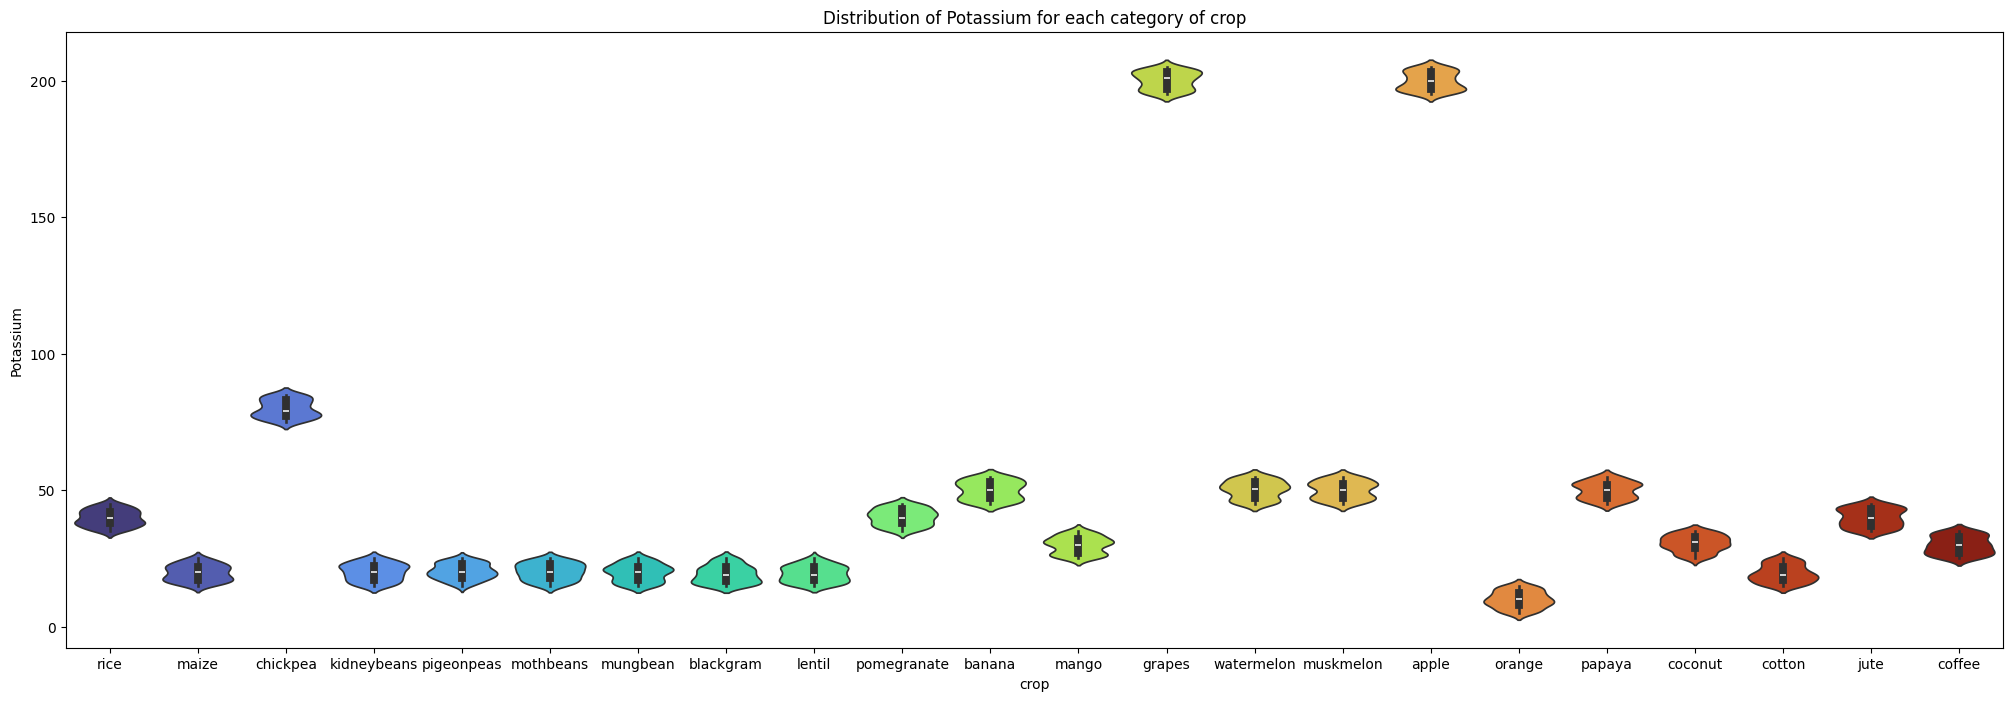

In [17]:
# skewness between Potassium and crop
plt.figure(figsize=(25, 8))
sns.violinplot(x='crop', y='Potassium', data=data, hue="crop", palette='turbo')
plt.title('Distribution of Potassium for each category of crop')
plt.xlabel('crop')
plt.ylabel('Potassium')
plt.show()

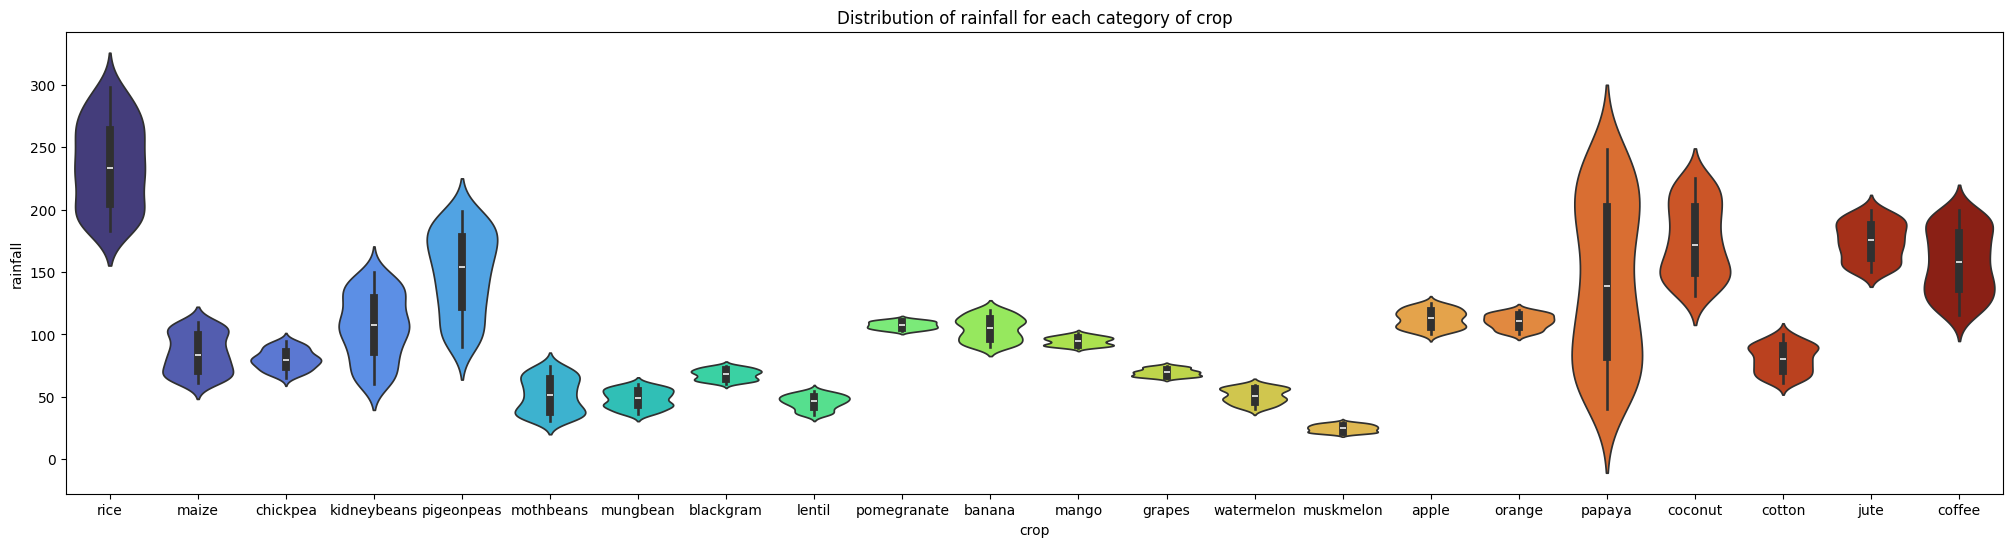

In [18]:
# skewness between rainfall and crop
plt.figure(figsize=(25, 6))
sns.violinplot(x='crop', y='rainfall', data=data, hue="crop", palette='turbo')
plt.title('Distribution of rainfall for each category of crop')
plt.xlabel('crop')
plt.ylabel('rainfall')
plt.show()

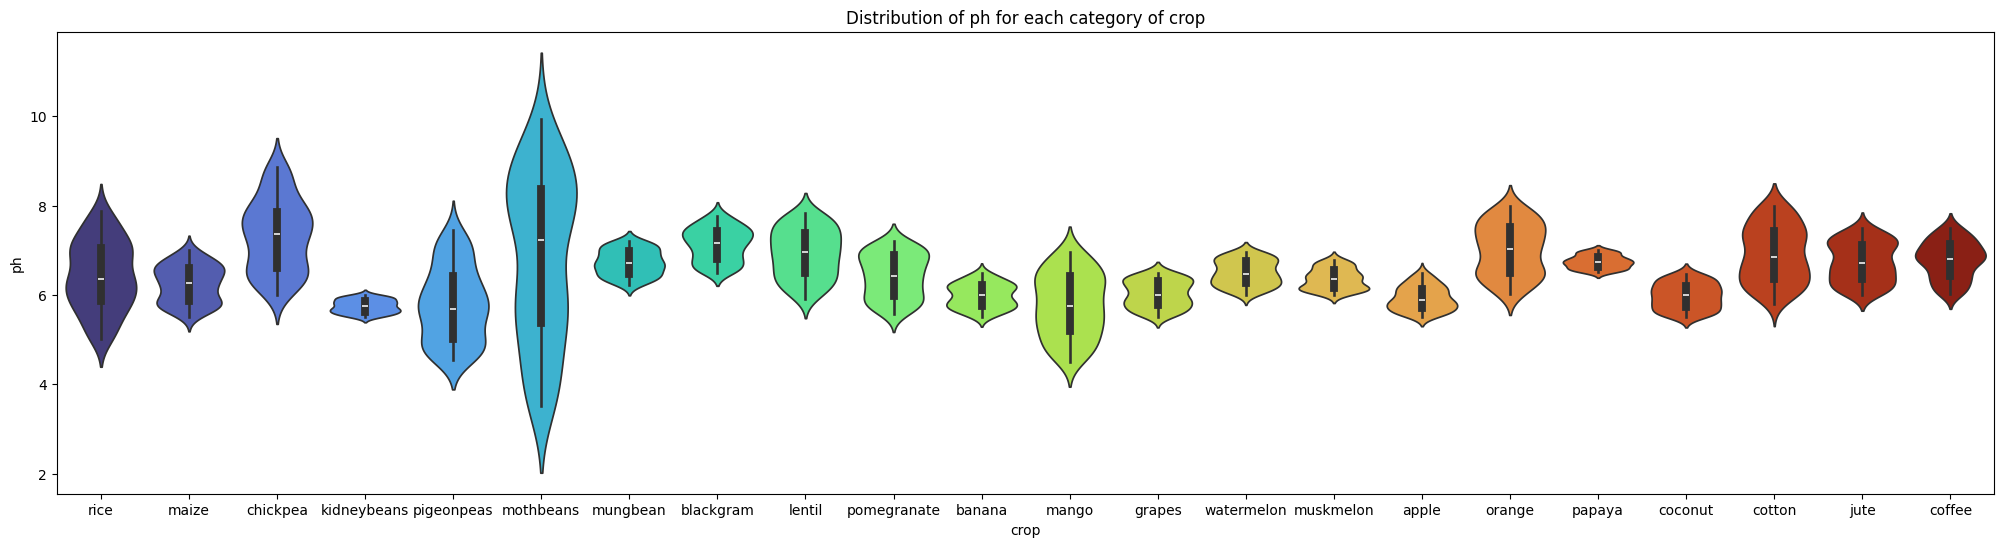

In [19]:
# skewness between PH and crop
plt.figure(figsize=(25, 6))
sns.violinplot(x='crop', y='ph', data=data, hue="crop", palette='turbo')
plt.title('Distribution of ph for each category of crop')
plt.xlabel('crop')
plt.ylabel('ph')
plt.show()

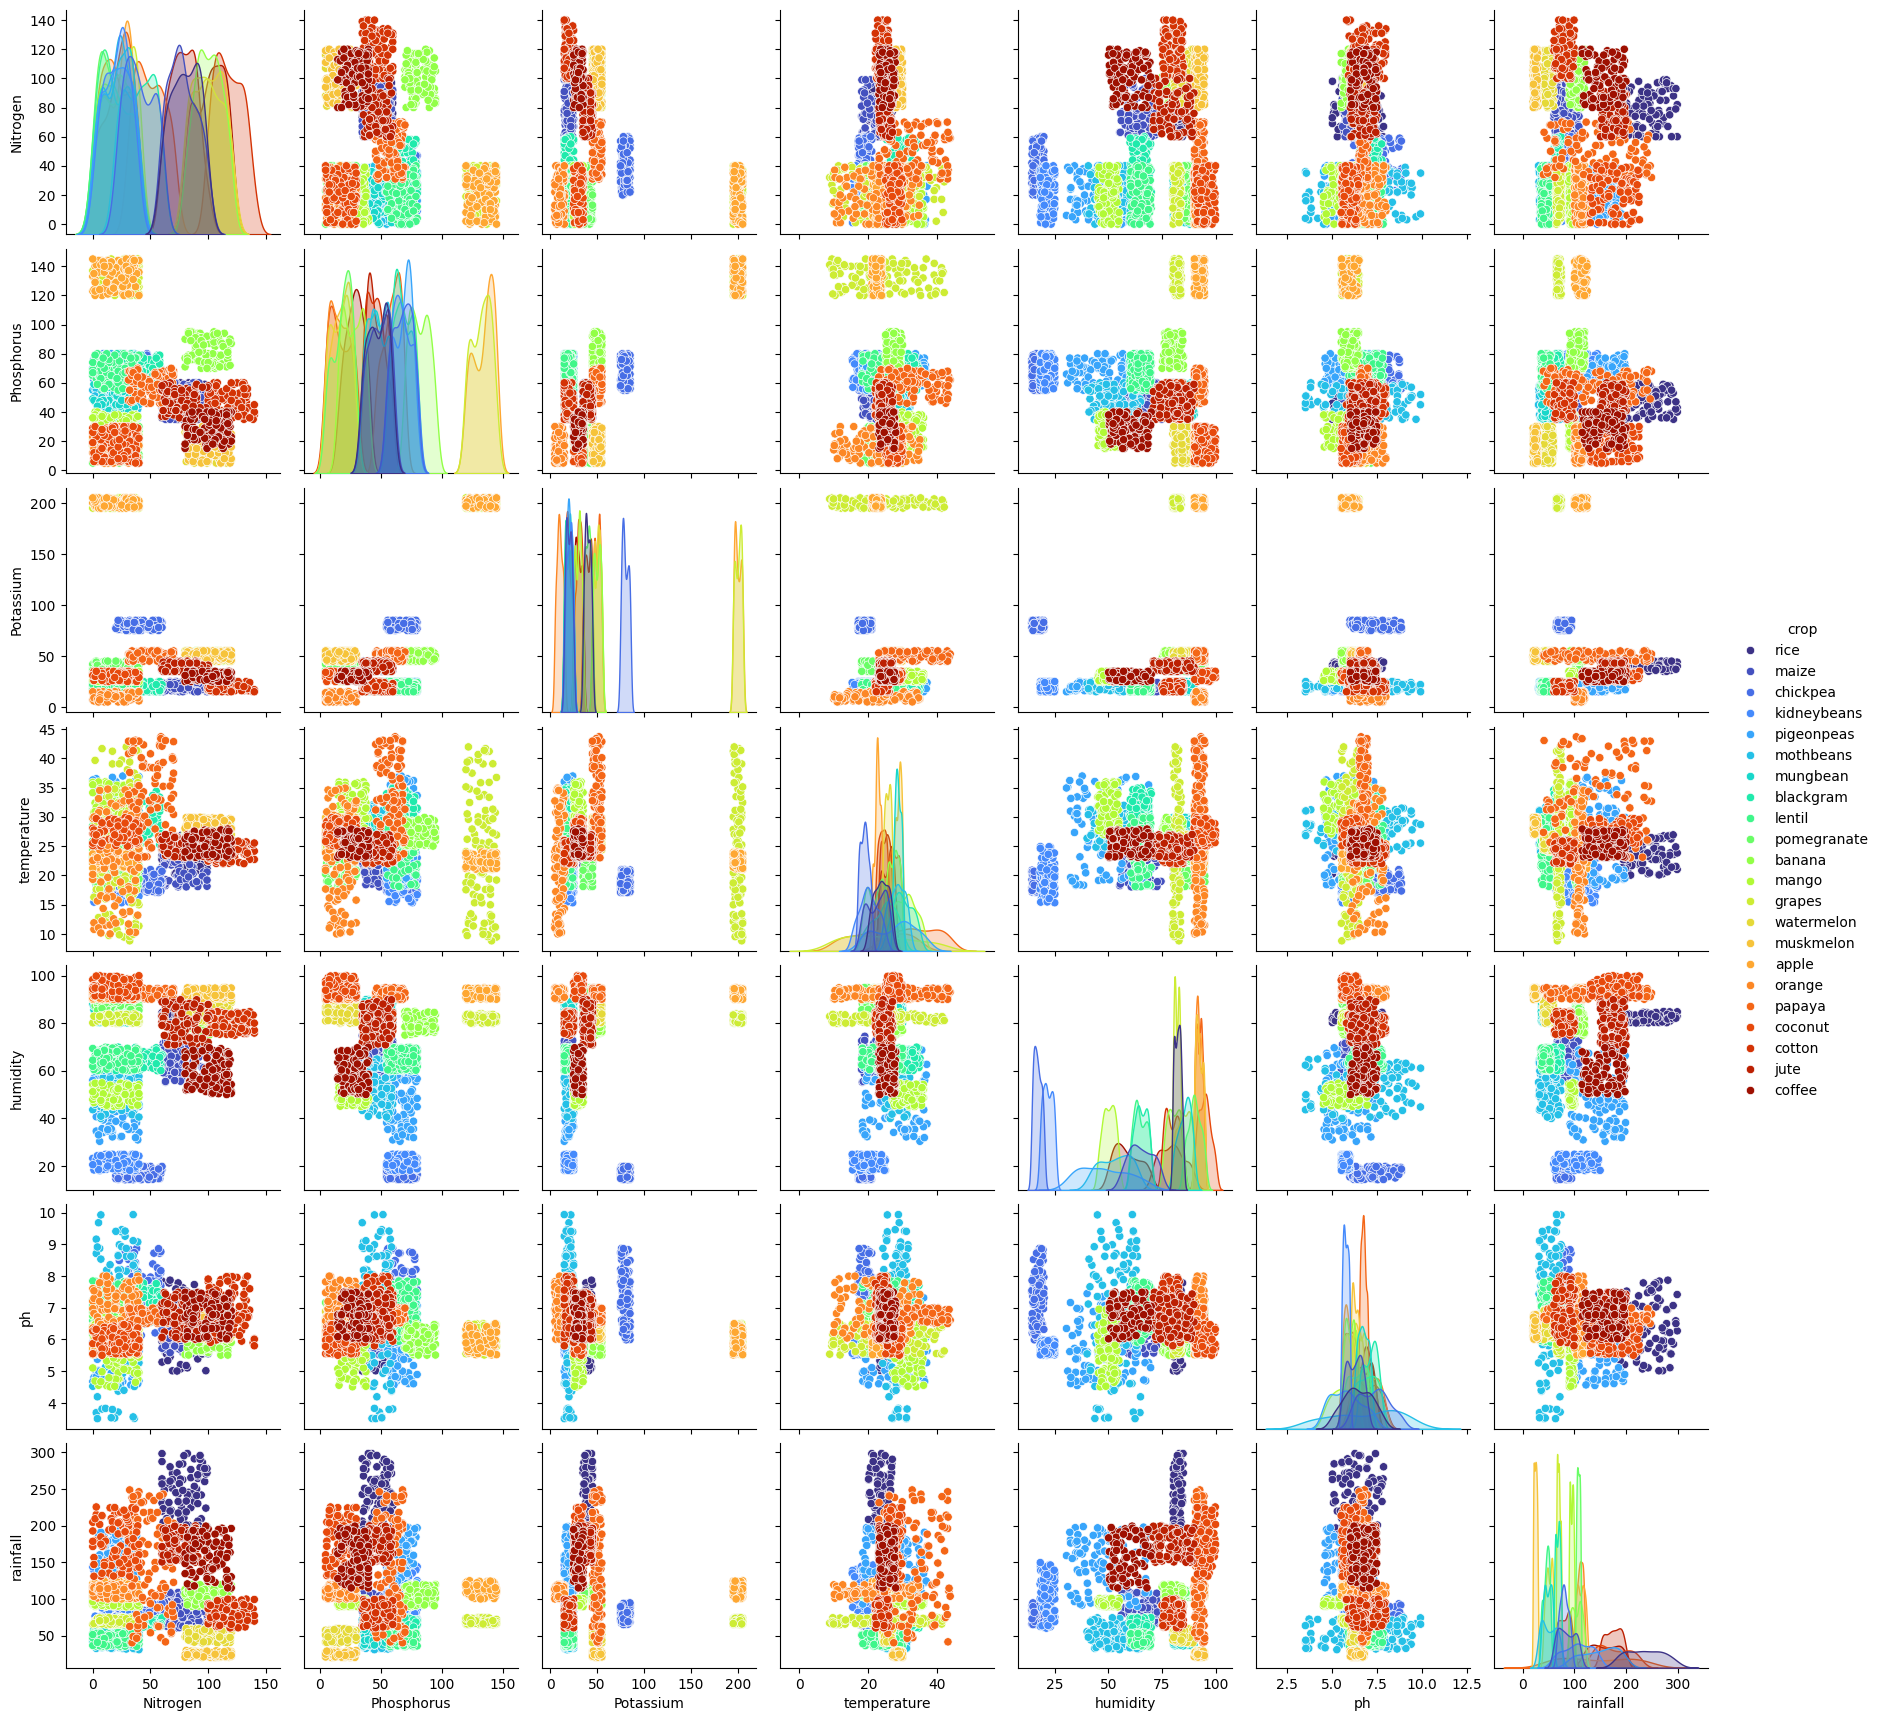

In [20]:
sns.pairplot(data, hue = "crop", palette = "turbo")

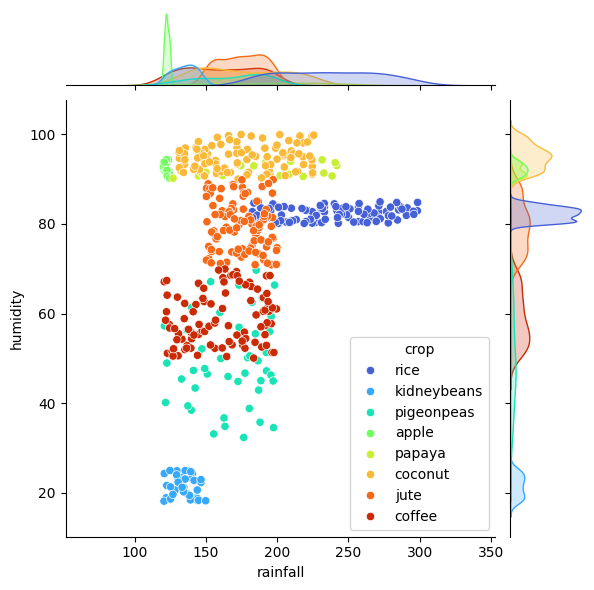

In [21]:
sns.jointplot(x="rainfall",y="humidity",data=data[(data['temperature']<30) & (data['rainfall']>120)],hue="crop", palette = "turbo")

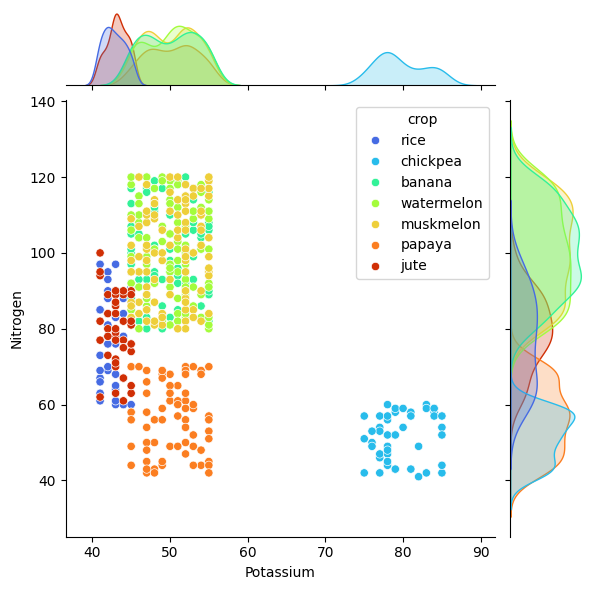

In [22]:

sns.jointplot(x="Potassium",y="Nitrogen",data=data[(data['Nitrogen']>40)&(data['Potassium']>40)],hue="crop", palette = "turbo")

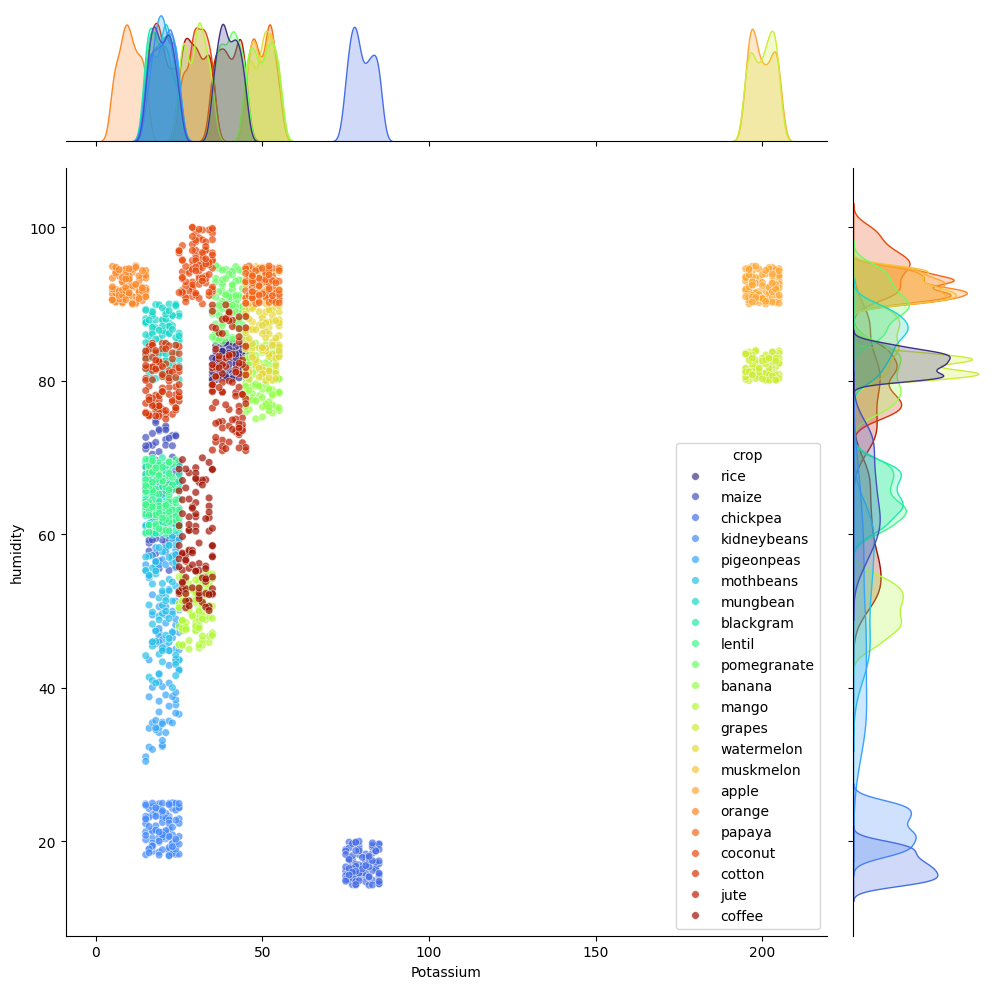

In [23]:
sns.jointplot(x="Potassium",y="humidity",data=data,hue='crop',height=10, s=30,alpha=0.7, palette = "turbo")

<Axes: xlabel='ph', ylabel='crop'>

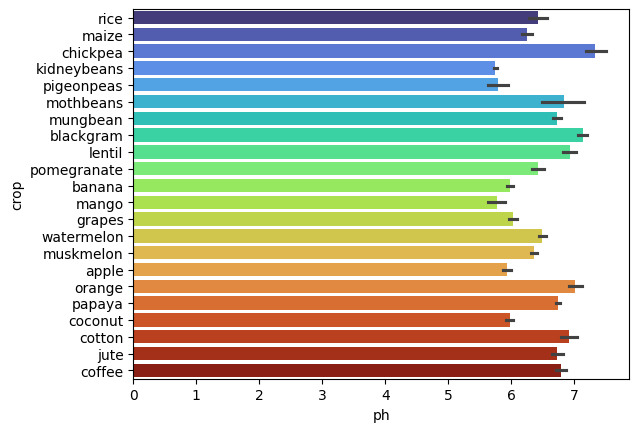

In [24]:
sns.barplot(y='crop',x='ph',data=data, hue="crop", palette = "turbo")

<Axes: xlabel='Phosphorus', ylabel='crop'>

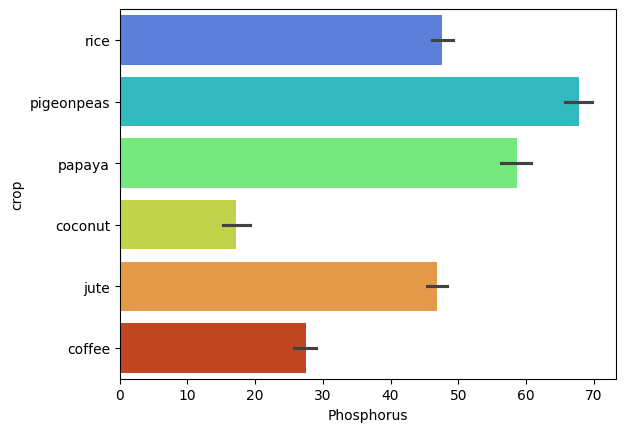

In [25]:
sns.barplot(y='crop',x='Phosphorus',data=data[data['rainfall']>150], hue="crop", palette = "turbo")

<Axes: xlabel='Potassium', ylabel='rainfall'>

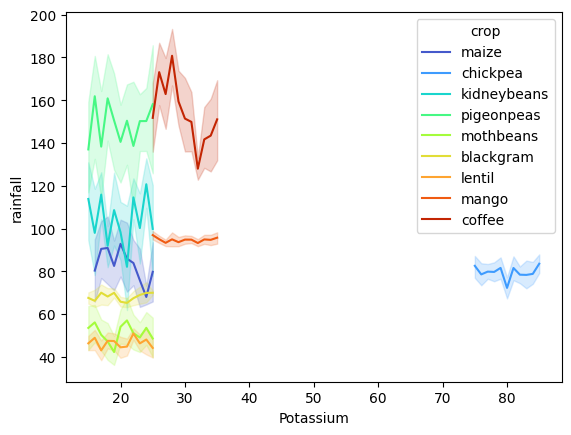

In [26]:
sns.lineplot(data = data[(data['humidity']<65)], x = "Potassium", y = "rainfall",hue="crop", palette = "turbo")

<Axes: >

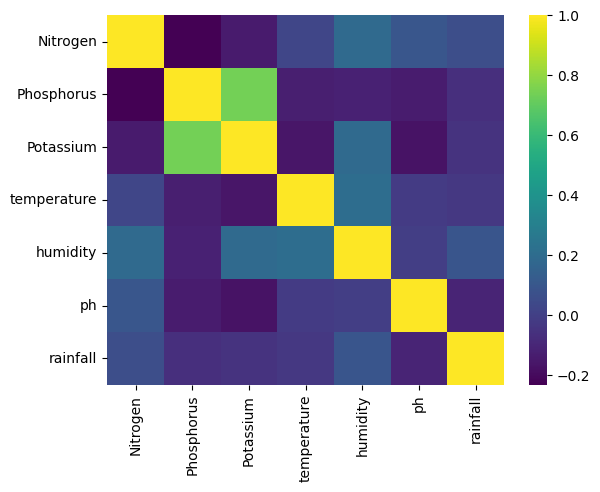

In [27]:
sns.heatmap(x.corr(), cmap='viridis')

In [28]:
# Select only numeric columns from your DataFrame
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Print the correlation matrix
print(correlation_matrix)

             Nitrogen  Phosphorus  Potassium  temperature  humidity        ph  \
Nitrogen     1.000000   -0.231460  -0.140512     0.026504  0.190688  0.096683   
Phosphorus  -0.231460    1.000000   0.736232    -0.127541 -0.118734 -0.138019   
Potassium   -0.140512    0.736232   1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504   -0.127541  -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688   -0.118734   0.190859     0.205320  1.000000 -0.008483   
ph           0.096683   -0.138019  -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020   -0.063839  -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
Nitrogen     0.059020  
Phosphorus  -0.063839  
Potassium   -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000  


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=1)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)

# we must apply the scaling to the test set as well that we are computing for the training set
x_test = scaler.transform(x_test)

In [30]:

# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [31]:
# model selection

In [32]:
# Initialize the GradientBoostingClassifier model
gbc = GradientBoostingClassifier()

# Train the model
gbc.fit(x_train, y_train)

# Make predictions on the testing set
y_pred1 = gbc.predict(x_test)

# accuracy 
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy of GradientBoostingClassifier :", accuracy)
#precision 
precision = precision_score(y_test, y_pred1, average='weighted')
print("Precision Score of GradientBoostingClassifier:", precision)

#recall score
recall = recall_score(y_test, y_pred1, average = 'weighted')
print("recall_score of GradientBoostingClassifier:", recall)

#f1_score 
f1 = f1_score(y_test, y_pred1, average = 'weighted')
print("f1_score of GradientBoostingClassifier:", f1)

Accuracy of GradientBoostingClassifier : 0.9818181818181818
Precision Score of GradientBoostingClassifier: 0.9842712842712842
recall_score of GradientBoostingClassifier: 0.9818181818181818
f1_score of GradientBoostingClassifier: 0.9818514668069125


In [33]:
# Initialize the RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()

# Train the model
randomforest.fit(x_train, y_train)


y_pred = randomforest.predict(x_test)

# accuracy 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of randomforest :", accuracy)

#precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision Score of randomforest:", precision)

#recall score
recall = recall_score(y_test, y_pred, average = 'weighted')
print("recall_score of randomforest:", recall)

#f1_score 
f1 = f1_score(y_test, y_pred, average = 'weighted')
print("f1_score of randomforest:", f1)




Accuracy of randomforest : 0.9931818181818182
Precision Score of randomforest: 0.9937348484848485
recall_score of randomforest: 0.9931818181818182
f1_score of randomforest: 0.9931754816901672


In [34]:
# Initialize the SVC model
from sklearn.svm import SVC
svm = SVC()

# Train the model
svm.fit(x_train, y_train)

y_pred2 = svm.predict(x_test)

#accuracy
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy of svm :", accuracy)

#precision 
precision = precision_score(y_test, y_pred2, average='weighted')
print("Precision Score of svm:", precision)

#recall score
recall = recall_score(y_test, y_pred2, average = 'weighted')
print("recall_score of svm:", recall)

#f1_score 
f1 = f1_score(y_test, y_pred2, average = 'weighted')
print("f1_score of svm:", f1)

Accuracy of svm : 0.9613636363636363
Precision Score of svm: 0.9672692837465565
recall_score of svm: 0.9613636363636363
f1_score of svm: 0.9612434056986235


In [35]:
# Initialize the DecisionTree model
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier()

# Train the model
DecisionTree.fit(x_train, y_train)

y_pred3 = DecisionTree.predict(x_test)

# Evaluate the accuracy of model
accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy of DecisionTree:", accuracy)

#precision 
precision = precision_score(y_test, y_pred3, average='weighted')
print("Precision Score of DecisionTree:", precision)

#recall score
recall = recall_score(y_test, y_pred3, average = 'weighted')
print("recall_score of DecisionTree:", recall)

#f1_score 
f1 = f1_score(y_test, y_pred3, average = 'weighted')
print("f1_score of DecisionTree:", f1)

Accuracy of DecisionTree: 0.9863636363636363
Precision Score of DecisionTree: 0.9868759018759019
recall_score of DecisionTree: 0.9863636363636363
f1_score of DecisionTree: 0.9863338104589819


In [36]:
# Initialize the DecisionTree model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

# Train the model
knn.fit(x_train, y_train)

y_pred4 = knn.predict(x_test)

# Evaluate the accuracy of model
accuracy = accuracy_score(y_test, y_pred4)
print("Accuracy of knn:", accuracy)

#precision 
precision = precision_score(y_test, y_pred4, average='weighted')
print("Precision Score of knn:", precision)

#recall score
recall = recall_score(y_test, y_pred4, average = 'weighted')
print("recall_score of knn:", recall)

#f1_score 
f1 = f1_score(y_test, y_pred4, average = 'weighted')
print("f1_score of knn:", f1)

Accuracy of knn: 0.9704545454545455
Precision Score of knn: 0.9721773896038601
recall_score of knn: 0.9704545454545455
f1_score of knn: 0.9706356327108521


In [37]:
#Function to take user input for crop recommendation
def get_crop_recommendation():
    # Take user input for various parameters
    Nitrogen = float(input("Enter Nitrogen content (N): "))
    Phosphorus = float(input("Enter Phosphorus content (P): "))
    Potassium = float(input("Enter Potassium content (K): "))
    temperature = float(input("Enter temperature: "))
    humidity = float(input("Enter humidity: "))
    pH = float(input("Enter pH value: "))
    rainfall = float(input("Enter rainfall: "))
    
    # Create a DataFrame with user input
    user_input = pd.DataFrame([[Nitrogen, Phosphorus, Potassium, temperature, humidity, pH, rainfall]], 
                               columns=x.columns)
    
    # Make prediction using the trained model
    predicted_crop = randomforest.predict(user_input)
    
    # Print the recommended crop
    print("Recommended crop:", predicted_crop[0])

# Call the function to get crop recommendation
get_crop_recommendation()


Recommended crop: rice


In [38]:
import pickle


In [39]:
with open('my_model', 'wb') as f:
    pickle.dump(randomforest,f)
    

In [40]:
with open('my_model', 'rb') as f:
    model = pickle.load(f)

In [41]:
model.predict([[90,42,43,20,82,6,202]])

c:\Users\abc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['rice'], dtype=object)